In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

data = pd.read_csv('/home/jovyan/Desktop/MGTA495-2/projects/Project 5/iris.csv')
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:

def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def plot_clusters(X, labels, centroids, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def k_means(X, k, max_iters=100, plot_steps=False):
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if plot_steps:
            plot_clusters(X, labels, centroids, iteration + 1)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        wcss += np.sum((X[labels == i] - centroids[i]) ** 2)
    return wcss


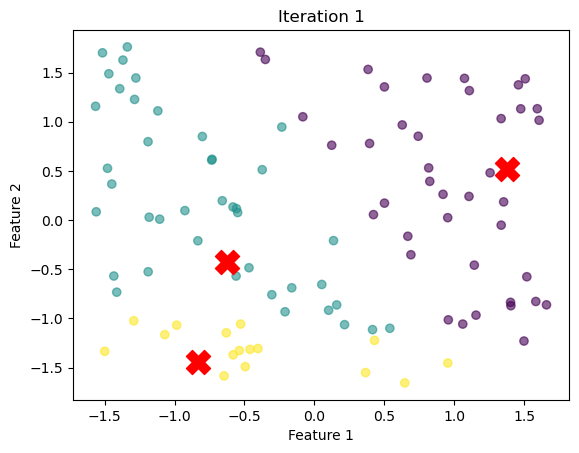

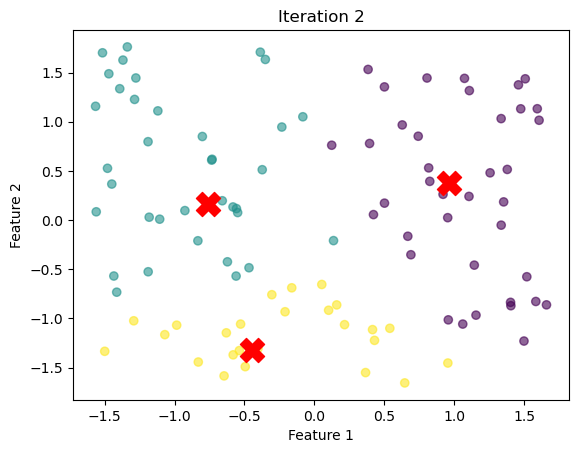

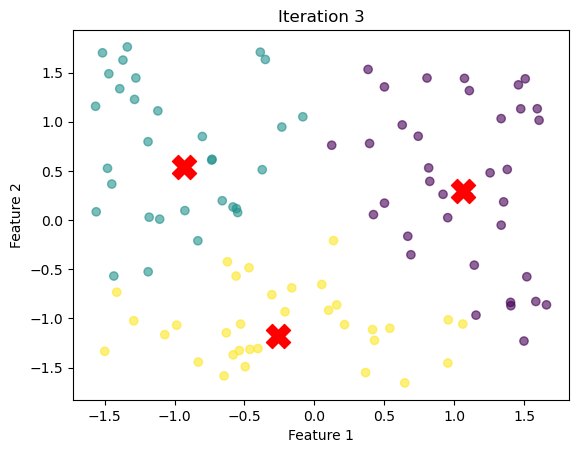

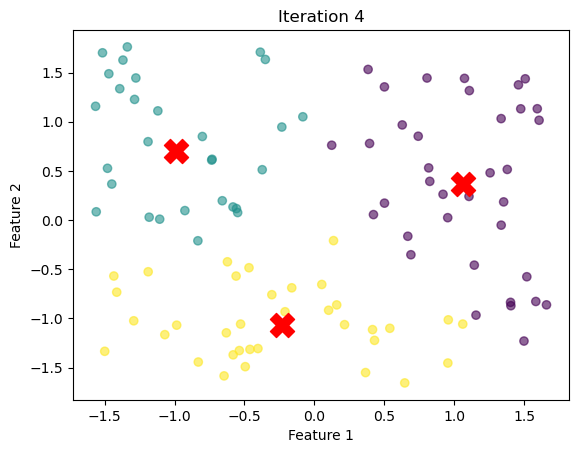

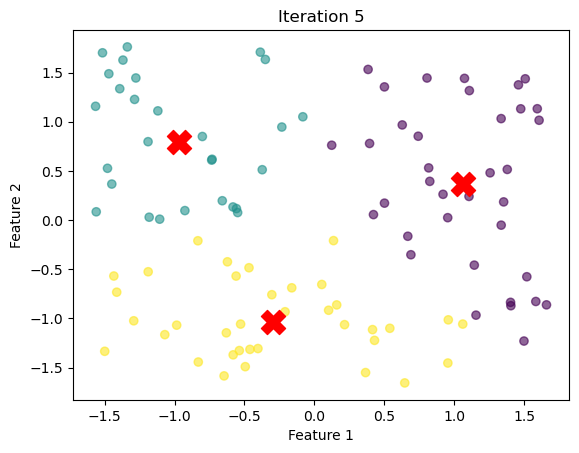

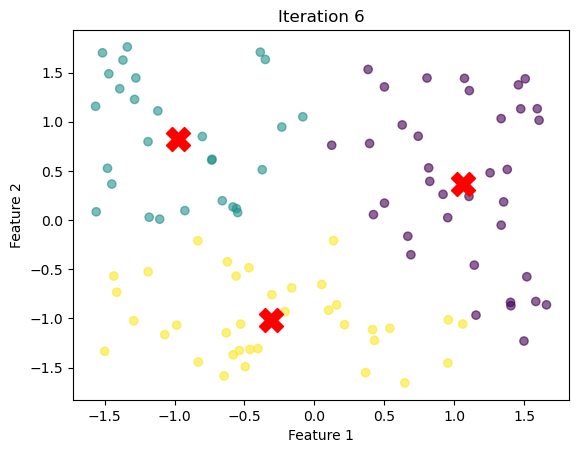

WCSS: 68.27202825097378


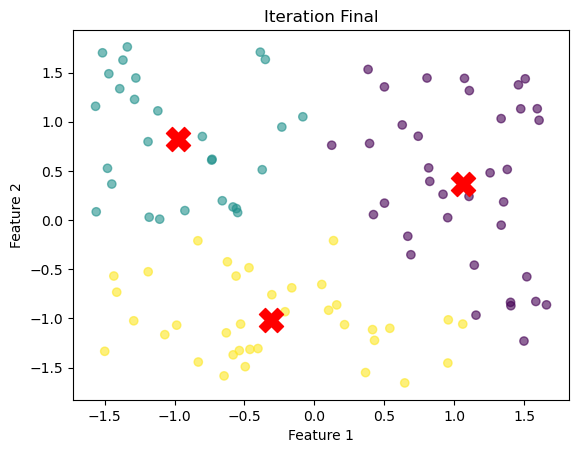

In [21]:
# Generate some synthetic data for testing
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 points in 2D

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of clusters
k = 3

# Apply K-means with plotting enabled
centroids, labels = k_means(X_scaled, k, plot_steps=True)

# Calculate WCSS
wcss = calculate_wcss(X_scaled, labels, centroids)
print(f'WCSS: {wcss}')

# Final plot
plot_clusters(X_scaled, labels, centroids, 'Final')


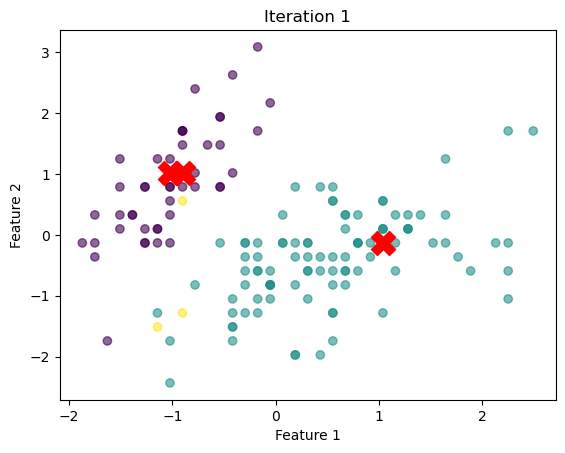

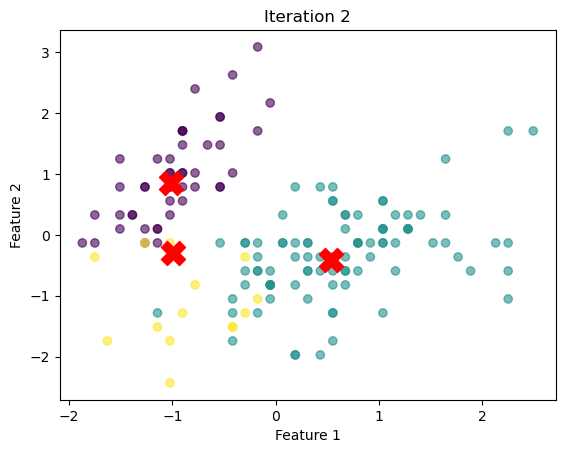

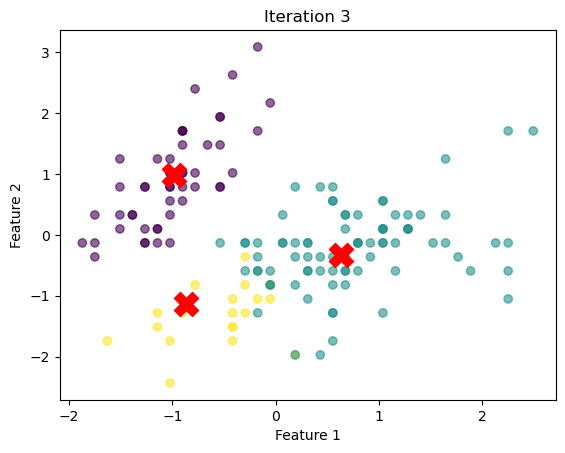

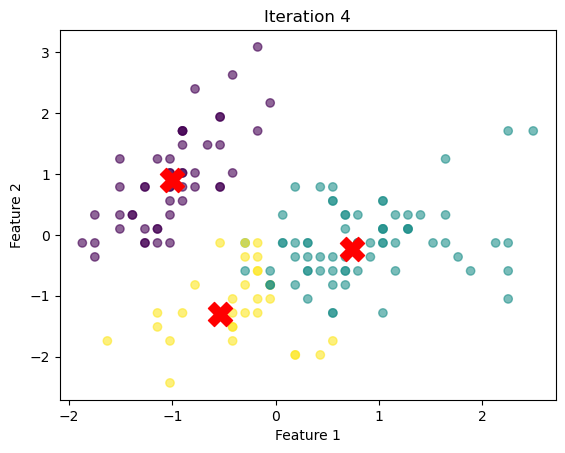

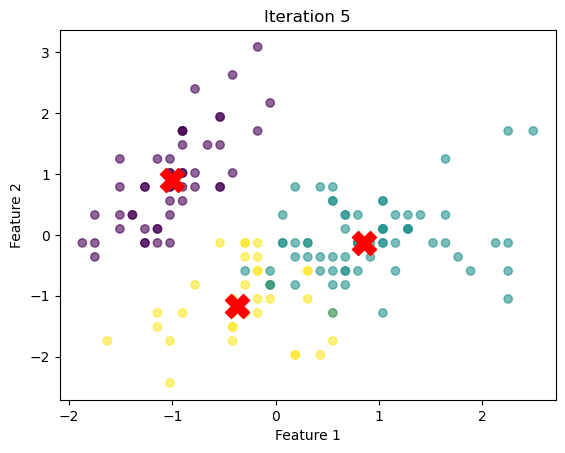

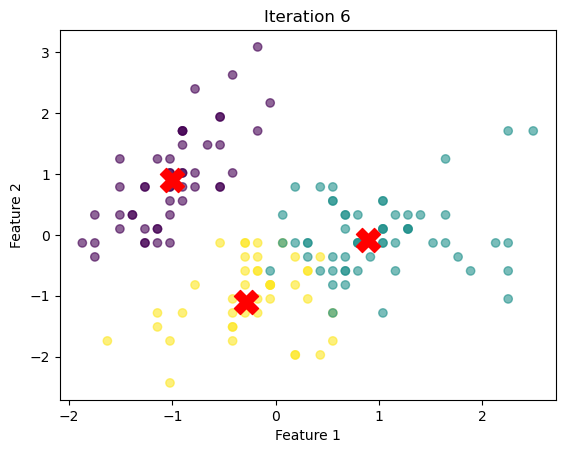

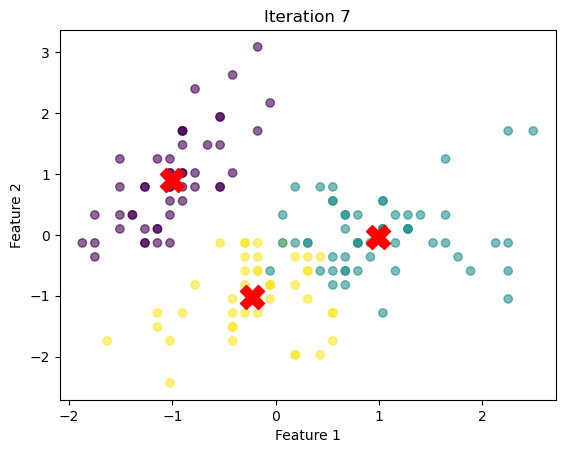

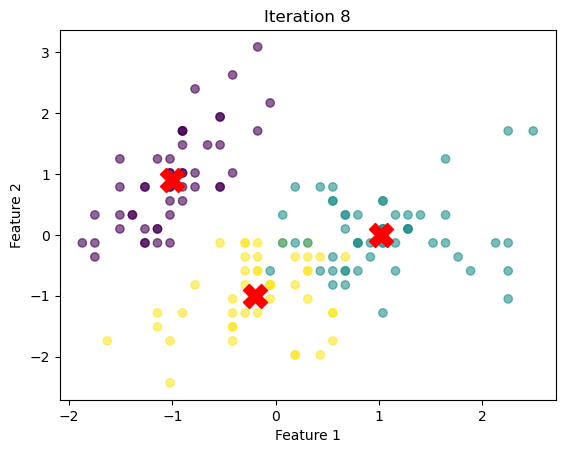

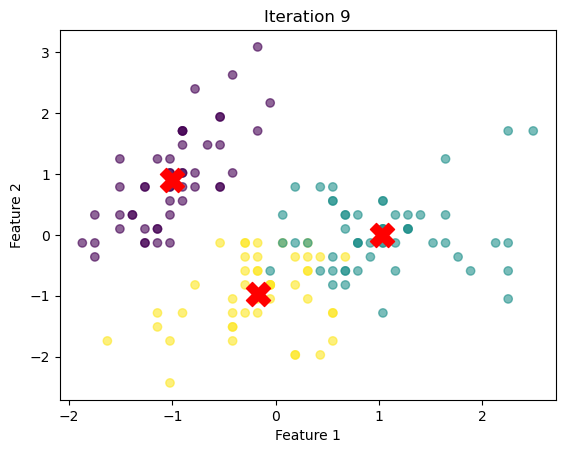

WCSS: 140.90153181202436


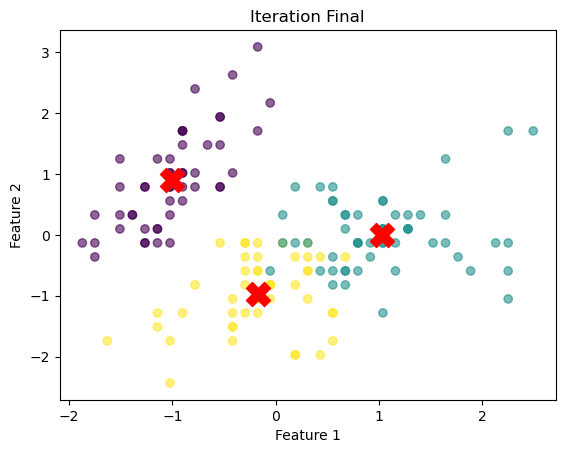

In [22]:
# Apply algorithm on the Iris data set 
# #Select only numeric columns 
X_data = data.select_dtypes(include=[np.number]).values

# Standardize the features
scaler = StandardScaler()
X_data_scaled = scaler.fit_transform(X_data)

# Define the K-means functions 
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def plot_clusters(X, labels, centroids, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
    plt.title(f'Iteration {iteration}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

def k_means(X, k, max_iters=100, plot_steps=False):
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if plot_steps:
            plot_clusters(X, labels, centroids, iteration + 1)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        wcss += np.sum((X[labels == i] - centroids[i]) ** 2)
    return wcss

# Number of clusters
k = 3  

centroids_data, labels_data = k_means(X_data_scaled, k, plot_steps=True)

# Calculate WCSS
wcss_data = calculate_wcss(X_data_scaled, labels_data, centroids_data)
print(f'WCSS: {wcss_data}')

# Final plot
plot_clusters(X_data_scaled, labels_data, centroids_data, 'Final')


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Built-in KMeans WCSS: 68.3159060866203


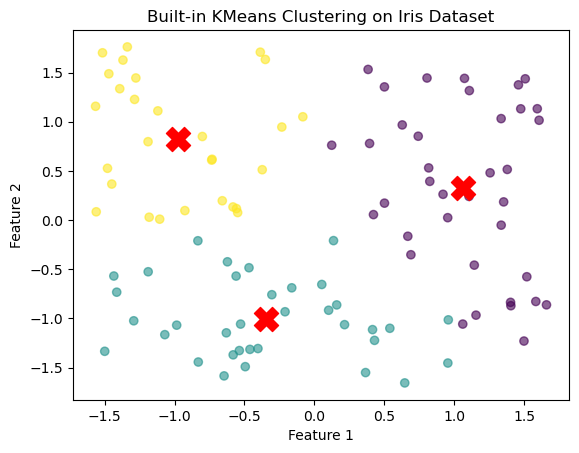

In [23]:


# # Load the Iris dataset
# file_path = '/home/jovyan/Desktop/MGTA495-2/projects/Project 5/iris.csv'  # Update this path to your actual dataset
# data = pd.read_csv(file_path)

# # Preprocess the data by removing the Species column and standardizing the features
# X = data.iloc[:, :-1].values
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Define the K-means functions (as defined earlier)
# def initialize_centroids(X, k):
#     return X[np.random.choice(X.shape[0], k, replace=False)]

# def assign_clusters(X, centroids):
#     distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
#     return np.argmin(distances, axis=1)

# def update_centroids(X, labels, k):
#     return np.array([X[labels == i].mean(axis=0) for i in range(k)])

# def plot_clusters(X, labels, centroids, iteration):
#     plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
#     plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
#     plt.title(f'Iteration {iteration}')
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

# def k_means(X, k, max_iters=100, plot_steps=False):
#     centroids = initialize_centroids(X, k)
#     for iteration in range(max_iters):
#         labels = assign_clusters(X, centroids)
#         new_centroids = update_centroids(X, labels, k)
#         if plot_steps:
#             plot_clusters(X, labels, centroids, iteration + 1)
#         if np.all(centroids == new_centroids):
#             break
#         centroids = new_centroids
#     return centroids, labels

# def calculate_wcss(X, labels, centroids):
#     wcss = 0
#     for i in range(len(centroids)):
#         wcss += np.sum((X[labels == i] - centroids[i]) ** 2)
#     return wcss

# # Number of clusters
# k = 3

# # Apply custom K-means to the Iris dataset with plotting enabled
# centroids_custom, labels_custom = k_means(X_scaled, k, plot_steps=False)

# # Calculate WCSS for custom K-means
# wcss_custom = calculate_wcss(X_scaled, labels_custom, centroids_custom)
# print(f'Custom K-means WCSS: {wcss_custom}')

# # Final plot for custom K-means
# plot_clusters(X_scaled, labels_custom, centroids_custom, 'Final')

# Apply built-in KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
labels_builtin = kmeans.fit_predict(X_scaled)
centroids_builtin = kmeans.cluster_centers_

# Calculate WCSS for built-in KMeans
wcss_builtin = kmeans.inertia_
print(f'Built-in KMeans WCSS: {wcss_builtin}')

# Final plot for built-in KMeans
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_builtin, cmap='viridis', alpha=0.6)
plt.scatter(centroids_builtin[:, 0], centroids_builtin[:, 1], s=300, c='red', marker='X')
plt.title('Built-in KMeans Clustering on Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


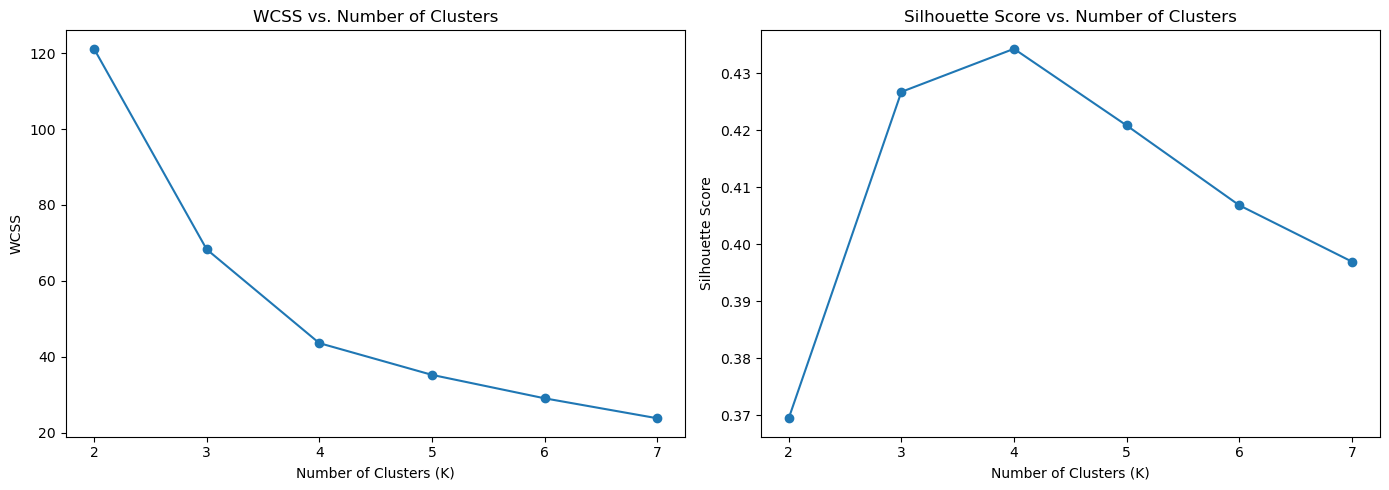

Optimal number of clusters according to WCSS: 7
Optimal number of clusters according to Silhouette Score: 4


In [24]:
# Function to calculate WCSS and Silhouette scores for various numbers of clusters
def evaluate_clusters(X, k_range):
    wcss = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, labels))
    
    return wcss, silhouette_scores

# Define the range of clusters
k_range = range(2, 8)

# Calculate WCSS and Silhouette scores
wcss, silhouette_scores = evaluate_clusters(X_scaled, k_range)

# Plot WCSS and Silhouette scores
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, wcss, marker='o')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Print the optimal number of clusters suggested by both metrics
optimal_wcss_k = k_range[np.argmin(wcss)]
optimal_silhouette_k = k_range[np.argmax(silhouette_scores)]

print(f'Optimal number of clusters according to WCSS: {optimal_wcss_k}')
print(f'Optimal number of clusters according to Silhouette Score: {optimal_silhouette_k}')
